In [258]:
import pandas as pd
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt


import csv's and create test and train data frames

In [259]:
train_file_path = '../data/processed/train.csv'
test_file_path = '../data/processed/test.csv'
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

get rid of unnecessary columns and split train data in to target variable and independent variables`

In [260]:
# remove unnessary features/columns (passID, Name, Ticket, Cabin, Survived)
removed_columns_train_df = train_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
removed_columns_test_df = test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

# split data into the traget variable (survivied) and the independent variables
y_train = removed_columns_train_df.iloc[:,0] #target_value_survived 
X_train = removed_columns_train_df.iloc[:, removed_columns_train_df.columns != 'Survived'] # independent_variables/target

#y_test = removed_columns_test_df.iloc[:,1] #target_value_survived 
X_test = removed_columns_test_df.iloc[:, removed_columns_test_df.columns != 'Survived'] # independent_variables/target

print(removed_columns_train_df)
print(y_train)
print(X_train)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass     Sex

convert categorical values to numerical ('SeX_train', 'Embarked')

In [261]:
#convert categorical columns to numerical form using sklearn label encoder
#'Sex' column: male(1) female(0)

X_train.loc[:,'Sex'] = LabelEncoder().fit_transform(X_train['Sex'])
X_test.loc[:,'Sex'] = LabelEncoder().fit_transform(X_test['Sex'])

#fill missing values in 'Embarked' column with most common value
#first determine mode of column 
#most_common_embarked_value = X_train['Embarked'].mode()[0]

#fill missing values with mode from previous step
X_train.loc[:,'Embarked'] = X_train['Embarked'].fillna('S').infer_objects(copy=False)
X_test.loc[:,'Embarked'] = X_test['Embarked'].fillna('S').infer_objects(copy=False)

#convert 'Embarked' categorical values to numerical form (0,1,2)
X_train.loc[:,'Embarked'] = LabelEncoder().fit_transform(X_train['Embarked'])
X_test.loc[:,'Embarked'] = LabelEncoder().fit_transform(X_test['Embarked'])

print(removed_columns_train_df)
print(y_train)
print(X_train)


     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass Sex   A

Univariate imputation, using simpleImputer to deal with missing values in 'Age' Using median values

In [262]:
import numpy as np 
from sklearn.impute import SimpleImputer
import pandas as pd

train_age = X_train[['Age']]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
train_age_imputed = imp.fit_transform(train_age)

X_train.loc[:, 'Age'] = train_age_imputed

test_age = X_test[['Age']]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
test_age_imputed = imp.fit_transform(test_age)

X_test.loc[:, 'Age'] = test_age_imputed

test_fare = X_test[['Fare']]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
test_fare_imputed = imp.fit_transform(test_fare)

X_test.loc[:, 'Fare'] = test_fare_imputed

print(X_train)
print(X_test.isna().sum())

     Pclass Sex   Age  SibSp  Parch     Fare Embarked
0         3   1  22.0      1      0   7.2500        2
1         1   0  38.0      1      0  71.2833        0
2         3   0  26.0      0      0   7.9250        2
3         1   0  35.0      1      0  53.1000        2
4         3   1  35.0      0      0   8.0500        2
..      ...  ..   ...    ...    ...      ...      ...
886       2   1  27.0      0      0  13.0000        2
887       1   0  19.0      0      0  30.0000        2
888       3   0  28.0      1      2  23.4500        2
889       1   1  26.0      0      0  30.0000        0
890       3   1  32.0      0      0   7.7500        1

[891 rows x 7 columns]
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


[0.10946806 0.28629393 0.24318356 0.04388495 0.04484873 0.24195661
 0.03036415]


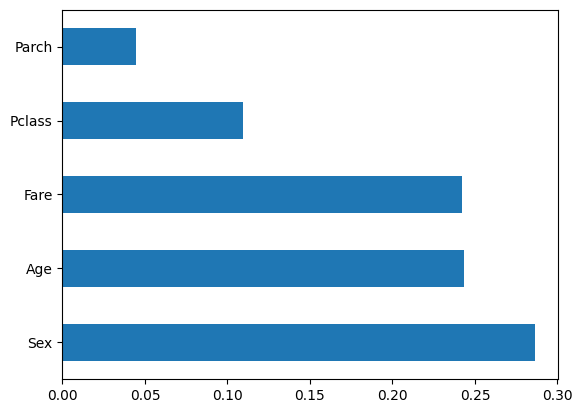

In [263]:
test_model = ExtraTreesClassifier()
test_model.fit(X_train,y_train)
print(test_model.feature_importances_)
feat_importances = pd.Series(test_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [264]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Apply the SelectKBest class to extract the top-5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
print(scores.nlargest(5,'score'))  # Print the 5-best features

      specs        score
5      Fare  4518.319091
1       Sex    92.702447
0    Pclass    30.873699
2       Age    21.649163
6  Embarked    10.202525


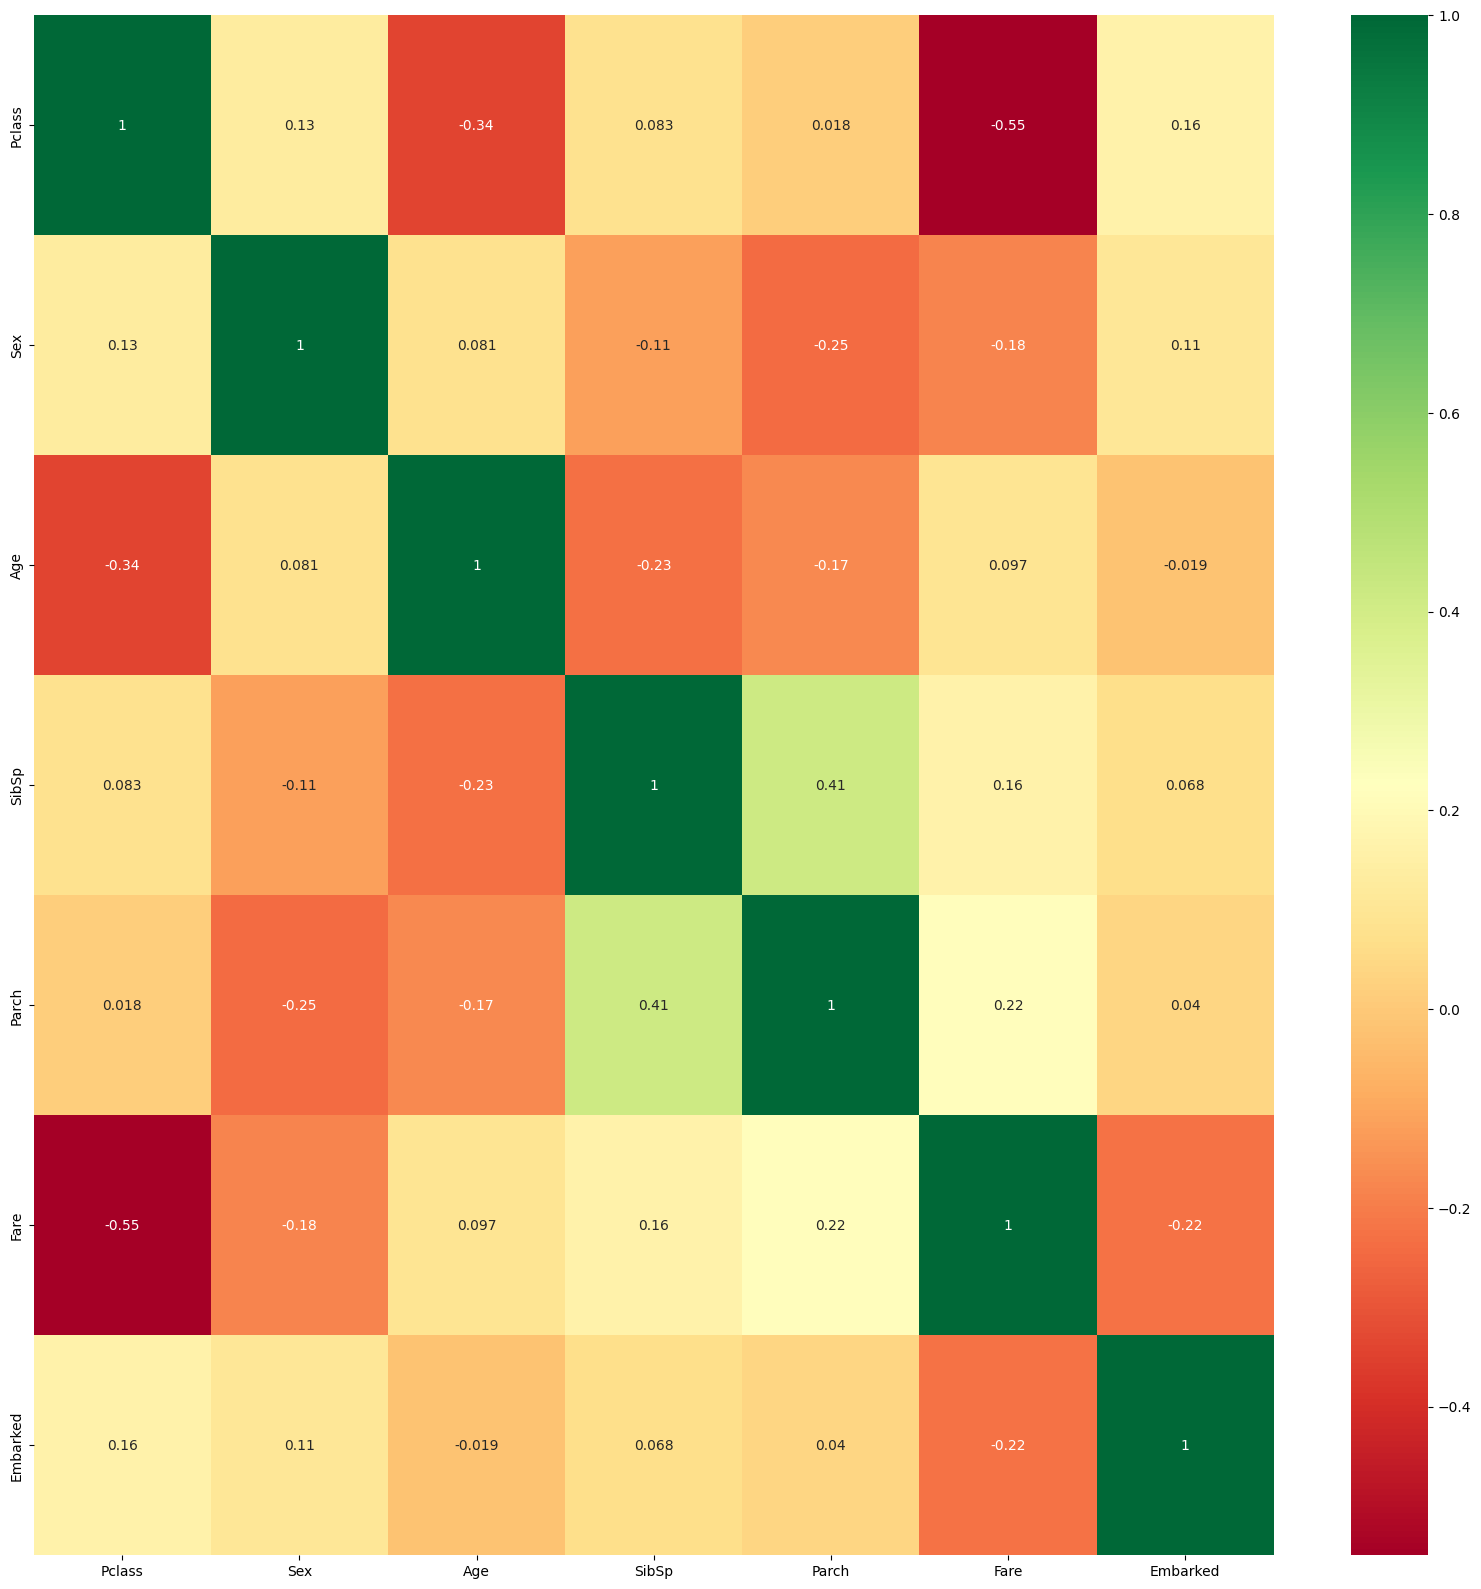

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))
# Plot the heatmap
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Linear Regression analysis

In [266]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [267]:
print(X_train)

     Pclass Sex   Age  SibSp  Parch     Fare Embarked
0         3   1  22.0      1      0   7.2500        2
1         1   0  38.0      1      0  71.2833        0
2         3   0  26.0      0      0   7.9250        2
3         1   0  35.0      1      0  53.1000        2
4         3   1  35.0      0      0   8.0500        2
..      ...  ..   ...    ...    ...      ...      ...
886       2   1  27.0      0      0  13.0000        2
887       1   0  19.0      0      0  30.0000        2
888       3   0  28.0      1      2  23.4500        2
889       1   1  26.0      0      0  30.0000        0
890       3   1  32.0      0      0   7.7500        1

[891 rows x 7 columns]


In [268]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [269]:
regr.fit(X_train, y_train)

LinearRegression()

In [270]:
predicted = regr.predict(X_train)
print(predicted)

[ 0.09362239  0.93477451  0.61961935  0.87890746  0.06041502  0.13477618
  0.30314278  0.11354063  0.58196726  0.8913118   0.69099983  0.7802204
  0.14677565 -0.07936352  0.68868739  0.62471628  0.10840186  0.27187413
  0.55233755  0.67578527  0.23533035  0.23732988  0.71692211  0.4481047
  0.58642047  0.43385046  0.16836119  0.40863954  0.64203287  0.10067207
  0.44465053  1.01409682  0.64199552  0.05237121  0.48807138  0.33086377
  0.1683624   0.14101827  0.58577617  0.71614236  0.49805689  0.74596085
  0.16855509  0.92514748  0.69384925  0.10071665  0.09540443  0.64199552
  0.08972488  0.62712561  0.04872673  0.140946    0.87301761  0.73589143
  0.294208    0.4481047   0.81887718  0.16548371  0.84175217 -0.03003621
  0.20290665  0.91081845  0.32268998  0.08758769  0.51373903  0.1128614
  0.77281818  0.15256433  0.47298456  0.02959393  0.24812196  0.448601
  0.32966421  0.14055839  0.09169115  0.11787314  0.10067207  0.10071665
  0.40010492  0.5979051   0.13553551  0.09537841  0.6420

In [271]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined

# Train Linear Regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Make predictions
predicted = regr.predict(X_train)

# Convert predictions to binary classes (0 or 1)
# This is only valid if y_train is binary (e.g., 0 or 1)
predicted_classes = np.round(predicted)
print(predicted_classes)


# Calculate accuracy score
accuracy = accuracy_score(y_train, predicted_classes)
print(f"Accuracy Score: {accuracy:.2f}")

# Get the count of unique values in predicted_classes (0 or 1)
predicted_classes_counts = np.unique(predicted_classes, return_counts=True)

# Print the count of each class (0 and 1)
for value, count in zip(predicted_classes_counts[0], predicted_classes_counts[1]):
    print(f"Class {int(value)}: {count} instances")

[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  0. -0.  1.  1.  0.  0.
  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.
  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.
  0.  0.  1.  0.  1. -0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0. -0.  0.  0.  1.  1.  0.  1.  0.  0.  0. -0.  0.  1.  0.
  0.  1.  0.  1.  0.  1.  1.  0. -0.  0.  1.  1.  0.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  1. -0. -0.  0.  0.  1.  0.  0. -0. -0.  1.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0. -0.  1.  0.  0.
  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  0.  0.
  1.  1.  0. -0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.
  1.  0.  1.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1

In [272]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(X_train, predicted)
print(f"Mean Absolute Error: {mae}")

# Mean Squared Error
mse = mean_squared_error(X_train, predicted)
print(f"Mean Squared Error: {mse}")

# Root Mean Squared Error
rmse = mean_squared_error(X_train, predicted, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# R-squared Score
r2 = r2_score(X_train, predicted)
print(f"R-squared Score: {r2}")

ValueError: y_true and y_pred have different number of output (7!=1)